In [21]:
import keras
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Loading the Fashion MNIST Dataset

In [23]:
(X_trainval, y_trainval), (X_test, y_test) = fashion_mnist.load_data()

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=1/6)

In [26]:
X_train = X_train.reshape(50000, 784)
X_val = X_val.reshape(10000, 784)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

# Normalizing the dataset

In [27]:
X_train /= 255
X_val /= 255
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'val samples')

50000 train samples
10000 val samples


In [31]:
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

# Plotting images from the dataset

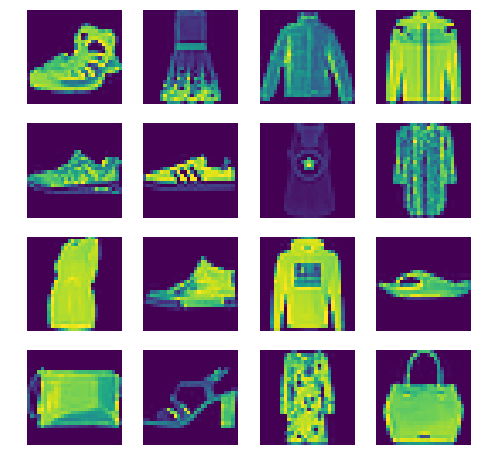

In [25]:
fig, axes1 = plt.subplots(4,4,figsize=(8,8))
for j in range(4):
        for k in range(4):
            i = np.random.choice(range(len(X_train)))
            axes1[j][k].set_axis_off()
            axes1[j][k].imshow(X_train[i:i+1][0])

# Building a vanilla model 

In [60]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
model0 = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_val,y_val))
model0_df = pd.DataFrame(model_dropout.history)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 1s 22us/step - loss: 0.6169 - acc: 0.7889 - val_loss: 0.4566 - val_acc: 0.8388
Epoch 2/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.4227 - acc: 0.8515 - val_loss: 0.3891 - val_acc: 0.8651
Epoch 3/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.3830 - acc: 0.8638 - val_loss: 0.3926 - val_acc: 0.8620
Epoch 4/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.3565 - acc: 0.8724 - val_loss: 0.3616 - val_acc: 0.8707
Epoch 5/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.3374 - acc: 0.8788 - val_loss: 0.3549 - val_acc: 0.8736
Epoch 6/100
50000/50000 [==============================] - 1s 14us/step - loss: 0.3196 - acc: 0.8837 - val_loss: 0.3313 - val_acc: 0.8806
Epoch 7/100
50000/50000 [==============================] - 1s 14us/step - loss: 0.3097 - acc: 0.8874 - val_loss: 0.3417 - 

50000/50000 [==============================] - 1s 15us/step - loss: 0.1147 - acc: 0.9565 - val_loss: 0.4473 - val_acc: 0.8816
Epoch 60/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.1077 - acc: 0.9607 - val_loss: 0.4250 - val_acc: 0.8879
Epoch 61/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.1052 - acc: 0.9616 - val_loss: 0.4451 - val_acc: 0.8863
Epoch 62/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.1111 - acc: 0.9585 - val_loss: 0.4571 - val_acc: 0.8849
Epoch 63/100
50000/50000 [==============================] - 1s 14us/step - loss: 0.1052 - acc: 0.9610 - val_loss: 0.4700 - val_acc: 0.8884
Epoch 64/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.1026 - acc: 0.9618 - val_loss: 0.4668 - val_acc: 0.8844
Epoch 65/100
50000/50000 [==============================] - 1s 14us/step - loss: 0.1007 - acc: 0.9627 - val_loss: 0.4645 - val_acc: 0.8873
Epoch 66/100
50000/50000 [==============

In [61]:
score = model.evaluate(X_val, y_val, verbose=0)
print("Val loss: {:.3f}".format(score[0]))
print("Val Accuracy: {:.3f}".format(score[1]))

Val loss: 0.616
Val Accuracy: 0.880


# Model with dropout

In [35]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
model_dropout = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_val,y_val))
model_dropout_df = pd.DataFrame(model_dropout.history)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.1264 - acc: 0.5978 - val_loss: 0.5277 - val_acc: 0.8243
Epoch 2/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.7159 - acc: 0.7482 - val_loss: 0.4773 - val_acc: 0.8403
Epoch 3/100
50000/50000 [==============================] - 1s 21us/step - loss: 0.6375 - acc: 0.7752 - val_loss: 0.4529 - val_acc: 0.8442
Epoch 4/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.6035 - acc: 0.7877 - val_loss: 0.4324 - val_acc: 0.8501
Epoch 5/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.5768 - acc: 0.7977 - val_loss: 0.4257 - val_acc: 0.8565
Epoch 6/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.5601 - acc: 0.8041 - val_loss: 0.4081 - val_acc: 0.8596
Epoch 7

50000/50000 [==============================] - 1s 21us/step - loss: 0.4307 - acc: 0.8438 - val_loss: 0.3743 - val_acc: 0.8688
Epoch 58/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.4356 - acc: 0.8406 - val_loss: 0.3739 - val_acc: 0.8710
Epoch 59/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.4319 - acc: 0.8416 - val_loss: 0.3717 - val_acc: 0.8695
Epoch 60/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.4292 - acc: 0.8448 - val_loss: 0.3664 - val_acc: 0.8753
Epoch 61/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.4306 - acc: 0.8438 - val_loss: 0.3745 - val_acc: 0.8700
Epoch 62/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.4301 - acc: 0.8437 - val_loss: 0.3758 - val_acc: 0.8717
Epoch 63/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.4309 - acc: 0.8423 - val_loss: 0.3892 - val_acc: 0.8677
Epoch 64/100
50000/50000 [==============

# Model with Batch Normalization and residuals connection

In [36]:
from keras.layers import Input, Dense, add

from keras.models import Model
from keras.layers import BatchNormalization

In [37]:
inputs = Input(shape=(784,))
# a layer instance is callable on a tensor, and returns a tensor
d_1 = Dense(64, activation='relu')(inputs)
bn_1 = BatchNormalization()(d_1)
d_2 = Dense(64, activation='relu')(bn_1)
bn_2 = BatchNormalization()(d_2)
skip1 = add([bn_1, bn_2])

predictions = Dense(10, activation='softmax')(skip1)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
model_bn_res = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_val,y_val))


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 44us/step - loss: 0.5198 - acc: 0.8165 - val_loss: 0.4415 - val_acc: 0.8414
Epoch 2/100
50000/50000 [==============================] - 1s 21us/step - loss: 0.3767 - acc: 0.8650 - val_loss: 0.4035 - val_acc: 0.8561
Epoch 3/100
50000/50000 [==============================] - 1s 23us/step - loss: 0.3381 - acc: 0.8764 - val_loss: 0.3616 - val_acc: 0.8664
Epoch 4/100
50000/50000 [==============================] - 1s 21us/step - loss: 0.3159 - acc: 0.8861 - val_loss: 0.4024 - val_acc: 0.8586
Epoch 5/100
50000/50000 [==============================] - 1s 21us/step - loss: 0.2990 - acc: 0.8902 - val_loss: 0.4652 - val_acc: 0.8371
Epoch 6/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.2827 - acc: 0.8955 - val_loss: 0.3582 - val_acc: 0.8720
Epoch 7/100
50000/50000 [==============================] - 1s 21us/step - loss: 0.2760 - acc: 0.8976 - val_loss: 0.3912 - 

50000/50000 [==============================] - 1s 21us/step - loss: 0.1009 - acc: 0.9613 - val_loss: 0.5026 - val_acc: 0.8645
Epoch 60/100
50000/50000 [==============================] - 1s 21us/step - loss: 0.0928 - acc: 0.9661 - val_loss: 0.5059 - val_acc: 0.8794
Epoch 61/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.0943 - acc: 0.9658 - val_loss: 0.4809 - val_acc: 0.8776
Epoch 62/100
50000/50000 [==============================] - 1s 21us/step - loss: 0.0916 - acc: 0.9659 - val_loss: 0.5543 - val_acc: 0.8697
Epoch 63/100
50000/50000 [==============================] - 1s 21us/step - loss: 0.0912 - acc: 0.9667 - val_loss: 0.5067 - val_acc: 0.8788
Epoch 64/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.0906 - acc: 0.9658 - val_loss: 0.5321 - val_acc: 0.8770
Epoch 65/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.0890 - acc: 0.9662 - val_loss: 0.5159 - val_acc: 0.8757
Epoch 66/100
50000/50000 [==============

NameError: name 'Train' is not defined

In [51]:
model_res_df = pd.DataFrame(model_bn_res.history)

# Comparing all the three models

Text(0,0.5,'val accuracy')

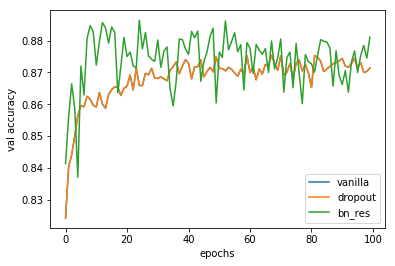

In [64]:
plt.plot(model0_df['val_acc'], label='vanilla')
plt.plot(model_dropout_df['val_acc'], label='dropout')
plt.plot(model_res_df['val_acc'], label='bn_res')
plt.legend()
plt.xlabel("epochs")
plt.ylabel('val accuracy')

We see that vanilla model and Dropout model give very similar accuracy and then BN+res gives worse accuracy. 